<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/Mild_DR_Moderate_DR_CNN_model_Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split')

['train', 'val', 'test']

In [4]:
os.listdir('/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split/train')

['Mild', 'undersampled_Moderate']

In [8]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale = 1/255)

trainimages = datagen.flow_from_directory('/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split/train',
                                          target_size=(64,64),
                                          class_mode='binary')
valimages = datagen.flow_from_directory('/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split/val',
                                          target_size=(64,64),
                                          class_mode='binary')
testimages = datagen.flow_from_directory('/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split/test',
                                          target_size=(64,64),
                                          class_mode='binary')

Found 591 images belonging to 2 classes.
Found 74 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model = Sequential([Conv2D(32,(3,3), activation = 'relu', input_shape= (64,64,3)),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3), activation = 'relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(1, activation = 'sigmoid')
                    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [14]:
model.fit(trainimages,batch_size=32,epochs=10,validation_data=valimages)
model.save('mildmoderateDR_model.keras')

Epoch 1/10
19/19 [==============================] - 9s 477ms/step - loss: 0.4967 - accuracy: 0.7648 - val_loss: 0.5174 - val_accuracy: 0.7838
Epoch 2/10
19/19 [==============================] - 6s 295ms/step - loss: 0.4755 - accuracy: 0.7851 - val_loss: 0.5333 - val_accuracy: 0.7568
Epoch 3/10
19/19 [==============================] - 7s 332ms/step - loss: 0.4663 - accuracy: 0.7800 - val_loss: 0.5698 - val_accuracy: 0.7162
Epoch 4/10
19/19 [==============================] - 7s 375ms/step - loss: 0.4723 - accuracy: 0.7699 - val_loss: 0.5363 - val_accuracy: 0.7297
Epoch 5/10
19/19 [==============================] - 6s 302ms/step - loss: 0.4463 - accuracy: 0.7986 - val_loss: 0.5426 - val_accuracy: 0.7568
Epoch 6/10
19/19 [==============================] - 8s 395ms/step - loss: 0.4415 - accuracy: 0.7800 - val_loss: 0.5629 - val_accuracy: 0.7297
Epoch 7/10
19/19 [==============================] - 6s 315ms/step - loss: 0.4297 - accuracy: 0.8071 - val_loss: 0.6249 - val_accuracy: 0.6622
Epoch 

In [19]:
predictions = model.predict(testimages)

3/3 [==============================] - 1s 129ms/step


In [20]:
predictions[predictions<0.5]=0
predictions[predictions>0.5]=1

In [17]:
y_true = testimages.classes

In [21]:
from sklearn import metrics
metrics.confusion_matrix(y_true,predictions)

array([[28, 10],
       [20, 17]])

In [24]:
print(metrics.classification_report(y_true,predictions,
                                    target_names=['mild DR','moderate DR']))

              precision    recall  f1-score   support

     mild DR       0.58      0.74      0.65        38
 moderate DR       0.63      0.46      0.53        37

    accuracy                           0.60        75
   macro avg       0.61      0.60      0.59        75
weighted avg       0.61      0.60      0.59        75



In [23]:
testimages.class_indices

{'Mild': 0, 'undersampled_Moderate': 1}

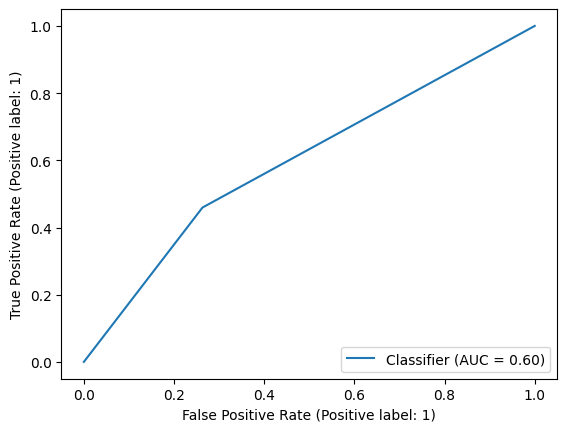

In [25]:
metrics.RocCurveDisplay.from_predictions(y_true,predictions)

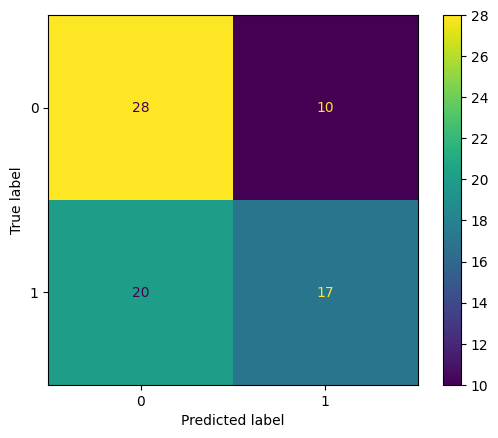

In [26]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true,predictions)


1/1 [==============================] - 0s 351ms/step
Prediction: Mild DR


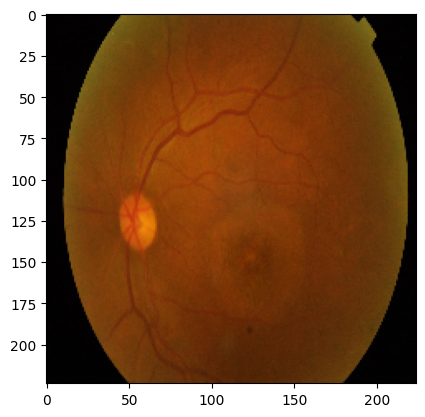

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/mildmoderateDR_model.keras') # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(64,64))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Moderate DR"  # Example class names, modify as per your binary classes
    else:
        return "Mild DR"

# Example usage:
unknown_image_path = "/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split/test/Mild/0684311afdfc.png"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split/test/Mild/0684311afdfc.png')
plt.imshow(testimage)

1/1 [==============================] - 0s 37ms/step
Prediction: Moderate DR


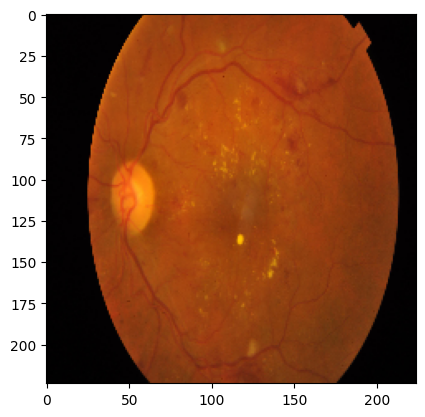

In [32]:
# Example usage:
unknown_image_path = "/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split/test/undersampled_Moderate/07a3be30563b.png"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split/test/undersampled_Moderate/07a3be30563b.png')
plt.imshow(testimage)